In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [6]:
cd Minneapolis_Weather_Predictor

C:\Users\lizba\Desktop\ML\Minneapolis_Weather_Predictor


In [ ]:
# Read the csv file into a pandas DataFrame
temps = pd.read_csv('Min_Max.csv')
temps.head()

In [8]:
# Assign the data to X and y
# Note: Sklearn requires a two-dimensional array of values
# so we use reshape to create this

X = temps.Max_Temp_f.values.reshape(-1, 1)
y = temps.Min_Temp_f.values.reshape(-1, 1)

print("Shape: ", X.shape, y.shape)
X

Shape:  (3809, 1) (3809, 1)


array([[ 6],
       [ 1],
       [ 7],
       ...,
       [83],
       [86],
       [81]], dtype=int64)

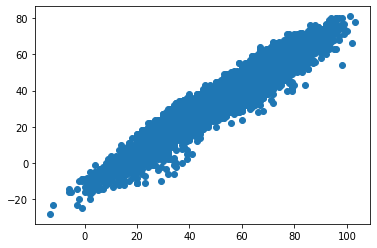

In [9]:
# checking to see if there is  Linear Relationship
plt.scatter(X, y)

In [10]:
# Create the model and fit the model to the data
from sklearn.linear_model import LinearRegression

In [13]:
model = LinearRegression()

In [15]:
# Fit the model to the data. 
# Note: This is the training step where you fit the line to the data.
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [16]:
# Print the coefficient and the intercept for the model
print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_)

Weight coefficients:  [[0.89306022]]
y-axis intercept:  [-10.9351734]


In [17]:
# Note: we have to transform our min and max values 
# so they are in the format: array([[ 1.17]])
# This is the required format for `model.predict()`
x_min = np.array([[X.min()]])
x_max = np.array([[X.max()]])
print(f"Min X Value: {x_min}")
print(f"Max X Value: {x_max}")

Min X Value: [[-13]]
Max X Value: [[103]]


In [25]:
# Calculate the y_min and y_max using model.predict and x_min and x_max

### BEGIN SOLUTION
y_min = model.predict(x_min)
y_max = model.predict(x_max)

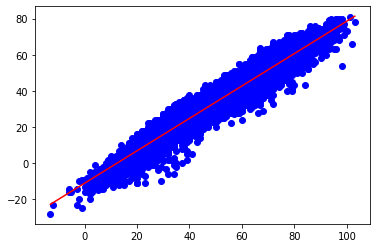

In [26]:
plt.scatter(X, y, c='blue')
plt.plot([x_min[0], x_max[0]], [y_min[0], y_max[0]], c='red')

In [18]:
from sklearn.metrics import mean_squared_error, r2_score

# Use our model to predict a value
predicted = model.predict(X)

# Score the prediction with mse and r2
mse = mean_squared_error(y, predicted)
r2 = r2_score(y, predicted)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

Mean Squared Error (MSE): 36.631802617955756
R-squared (R2 ): 0.9257545467545863


In [19]:
# split the training and testing data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [20]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [21]:
model.score(X_test, y_test)

0.9248658471365002